In [1]:
# importing neccessary libraries

In [2]:
import pandas as pd

In [3]:
# loading the dataset

In [4]:
df = pd.read_csv("UHI_d_NZFL.csv")

In [5]:
# understanding features

In [6]:
df.sample(5)

,sim_no,UHI_d,asphalt_ratio,park_grass_ratio,parcel_grass_ratio,podium_grass_ratio,GnPR,TCR,greenroof_ratio,SCR,...,avg_BH,avg_GPR,parcelArea,parkLocation,parkRadius,roadDensity,bldDensity,podiumDensity,treeDensity,roofType
3420,3420,0.175982,0.220688,0.066283,0.514901,0.092978,0.674162,0.0,0.000000,0.117214,...,34.7,1.189258,2,0,250,0.8,7,0.2,9,0
111,111,0.154737,0.167458,0.098406,0.690757,0.000000,0.789163,0.0,0.000000,0.043380,...,95.2,1.972404,3,42,200,0.8,3,0.0,0,0
2746,2746,0.168116,0.099550,0.076933,0.730373,0.000000,0.807306,0.0,0.000000,0.093144,...,43.4,1.468684,3,0,250,0.3,9,0.0,9,0
6234,6234,0.222968,0.092195,0.000000,0.535160,0.278446,0.813606,0.0,0.082391,0.106005,...,93.4,1.549070,6,42,100,0.8,5,0.4,0,1
6366,6366,0.244201,0.099550,0.271938,0.350659,0.129663,0.752260,0.0,0.129615,0.166766,...,65.8,2.462644,3,42,300,0.3,7,0.4,0,1


In [7]:
# removing the unnecessary columns

In [8]:
new_df = df[['GnPR',
    'treeDensity',
    'park_grass_ratio',
    'parcel_grass_ratio',
    'greenroof_ratio',
    'roadDensity',
    'bldDensity',
    'avg_BH',
    'avg_GPR','UHI_d']]

In [9]:
new_df

,GnPR,treeDensity,park_grass_ratio,parcel_grass_ratio,greenroof_ratio,roadDensity,bldDensity,avg_BH,avg_GPR,UHI_d
0,0.805629,0,0.034899,0.770730,0.000000,0.3,3,73.1,1.738649,0.163756
1,0.851438,0,0.000000,0.851438,0.000000,0.3,3,88.7,1.630876,0.158687
2,0.919077,0,0.000000,0.919077,0.000000,0.3,3,99.2,1.390217,0.145582
3,0.910829,0,0.000000,0.910829,0.000000,0.3,3,101.0,1.262646,0.139110
4,0.932979,0,0.079221,0.853758,0.000000,0.3,3,105.4,0.846786,0.121279
...,...,...,...,...,...,...,...,...,...,...
8995,0.613550,9,0.074712,0.359128,0.135745,0.8,11,22.1,1.059593,0.186005
8996,0.645847,9,0.078687,0.425741,0.157678,0.8,11,35.3,1.695053,0.222568
8997,0.604886,9,0.082933,0.367706,0.235218,0.8,11,48.8,2.281067,0.301918
8998,0.637183,9,0.088649,0.423824,0.219515,0.8,11,60.5,2.391622,0.310068


In [10]:
# identifying missing values

In [11]:
new_df.isnull().sum()

GnPR                  0
treeDensity           0
park_grass_ratio      0
parcel_grass_ratio    0
greenroof_ratio       0
roadDensity           0
bldDensity            0
avg_BH                0
avg_GPR               0
UHI_d                 0
dtype: int64

In [12]:
new_df.info()

<class 'pandas.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   GnPR                9000 non-null   float64
 1   treeDensity         9000 non-null   int64  
 2   park_grass_ratio    9000 non-null   float64
 3   parcel_grass_ratio  9000 non-null   float64
 4   greenroof_ratio     9000 non-null   float64
 5   roadDensity         9000 non-null   float64
 6   bldDensity          9000 non-null   int64  
 7   avg_BH              9000 non-null   float64
 8   avg_GPR             9000 non-null   float64
 9   UHI_d               9000 non-null   float64
dtypes: float64(8), int64(2)
memory usage: 703.3 KB


In [13]:
# identifying and removing duplicate values

In [14]:
new_df.duplicated().sum()

np.int64(2671)

In [15]:
print("Before:", new_df.shape)

new_df = new_df.drop_duplicates()

print("After:", new_df.shape)

Before: (9000, 10)
After: (6329, 10)


In [16]:
new_df.duplicated().sum()

np.int64(0)

In [17]:
# identifying outliers using boxplot

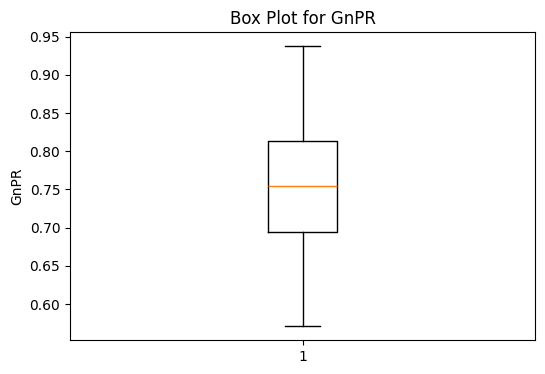

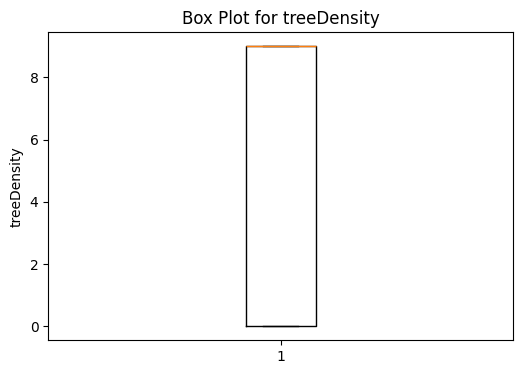

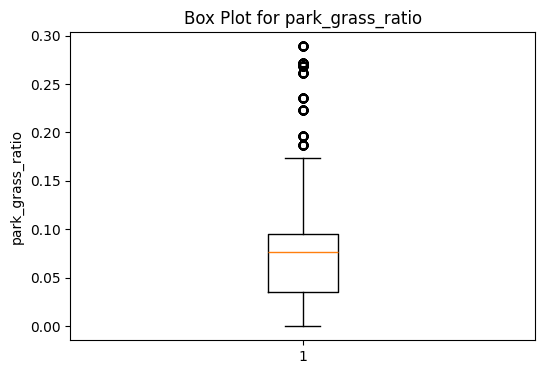

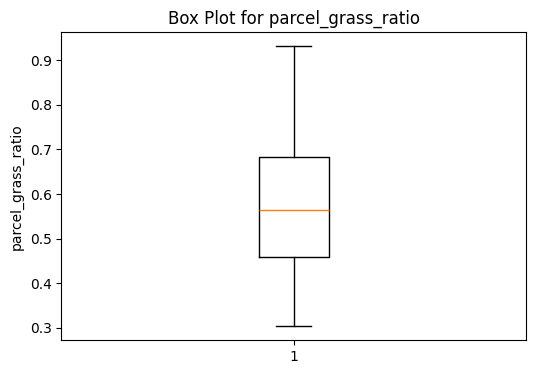

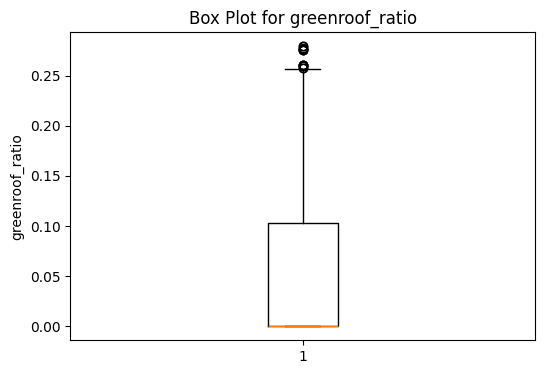

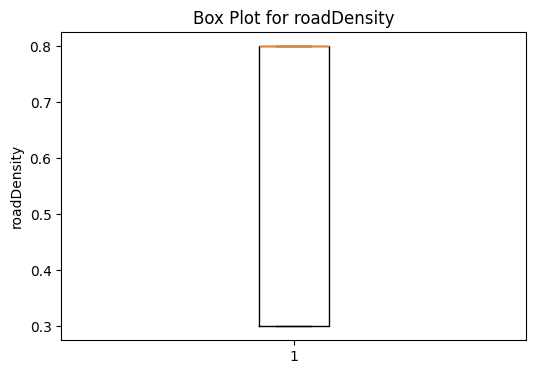

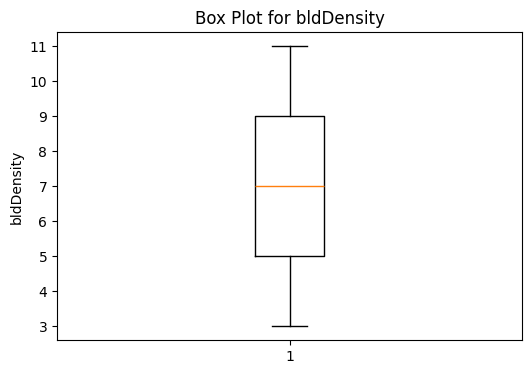

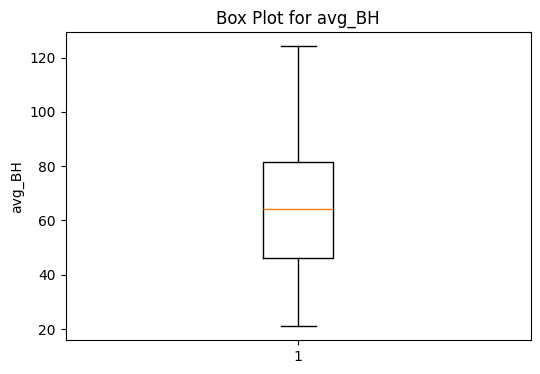

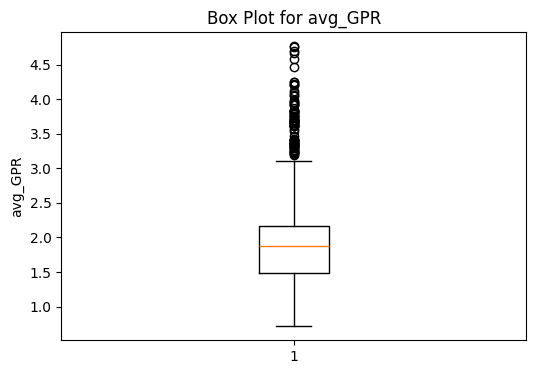

In [18]:
import matplotlib.pyplot as plt

columns = [
    'GnPR',
    'treeDensity',
    'park_grass_ratio',
    'parcel_grass_ratio',
    'greenroof_ratio',
    'roadDensity',
    'bldDensity',
    'avg_BH',
    'avg_GPR'
]

# Create boxplots
for col in columns:
    plt.figure(figsize=(6,4))
    plt.boxplot(new_df[col])
    plt.title(f'Box Plot for {col}')
    plt.ylabel(col)
    plt.show()

In [19]:
# removing outliers in the independent features

In [20]:
# List of columns
columns = [
    'GnPR',
    'treeDensity',
    'park_grass_ratio',
    'parcel_grass_ratio',
    'greenroof_ratio',
    'roadDensity',
    'bldDensity',
    'avg_BH',
    'avg_GPR'
]

# Create copy to avoid modifying original dataset
df_clean = new_df.copy()

# Function to remove outliers using IQR
for col in columns:
    
    # Calculate Q1 and Q3
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    
    # Calculate IQR
    IQR = Q3 - Q1
    
    # Define lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Remove outliers
    df_clean = df_clean[
        (df_clean[col] >= lower_bound) & 
        (df_clean[col] <= upper_bound)
    ]

# Check shape before and after
print("Original shape:", new_df.shape)
print("Cleaned shape:", df_clean.shape)

Original shape: (6329, 10)
Cleaned shape: (5767, 10)


In [21]:
# creating new preprocessed dataset

In [22]:
df_clean.to_csv("final_dataset.csv",index= False)

In [23]:
# Features (independent variables)
X = df_clean.drop("UHI_d", axis=1)

# Target (dependent variable)
y = df_clean["UHI_d"]

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,      # 80% training, 20% testing
    random_state=42
)

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
lr_model = LinearRegression()

In [27]:
lr_model.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [28]:
print("Intercept:", lr_model.intercept_)
print("Slopes (Coefficients):", lr_model.coef_)

Intercept: 0.336834936852713
Slopes (Coefficients): [-0.20760484  0.00030221 -0.27845217 -0.19758797 -0.00417347 -0.05925563
  0.00660518  0.00119564  0.04227562]


In [29]:
import pandas as pd

coeff_df = pd.DataFrame({
    "Feature": X_train.columns,
    "Slope": lr_model.coef_
})

print(coeff_df)

              Feature     Slope
0                GnPR -0.207605
1         treeDensity  0.000302
2    park_grass_ratio -0.278452
3  parcel_grass_ratio -0.197588
4     greenroof_ratio -0.004173
5         roadDensity -0.059256
6          bldDensity  0.006605
7              avg_BH  0.001196
8             avg_GPR  0.042276


In [31]:
print(f"For every 10% increase in greenery, the temperature changes by {abs(temp_change_10_percent):.4f} °C")

if temp_change_10_percent < 0:
    print(f"This means temperature DECREASES by {abs(temp_change_10_percent):.4f} °C for every 10% increase in greenery.")
else:
    print(f"This means temperature INCREASES by {temp_change_10_percent:.4f} °C for every 10% increase in greenery.")

For every 10% increase in greenery, the temperature changes by 0.4228 °C
This means temperature INCREASES by 0.4228 °C for every 10% increase in greenery.
